# Prueba Intertrimestral

**Nombre:**  Alejandro
**Apellidos:**  Chueca Manzanero

**Tiempo de la prueba:** 2 horas  
**Asignatura:** Desarrollo de Aplicaciones para la Visualización de Datos  
**Fecha:** 16 de octubre de 2025  

## Instrucciones

- Escribe **código limpio y autoexplicativo**.  
- Se pueden utilizar **los materiales de clase**.  
- Se puede utilizar **internet** para búsqueda de dudas y documentación.  
- **No se puede utilizar ningún tipo de LLM** (ChatGPT, Copilot, Gemini, etc.).  
- **No se puede utilizar mensajería instantánea**.  
- Al finalizar, **sube tu notebook a GitHub** y envía el enlace del fichero en el siguiente formulario:  
[https://forms.office.com/e/LFVwu9z6uQ](https://forms.office.com/e/LFVwu9z6uQ)


## Dataset “Life Style Data”

El dataset contiene información sobre hábitos de vida (alimentación, sueño, ejercicio, consumo de tabaco o alcohol, etc.) y medidas de salud (IMC, presión arterial, etc.) para diferentes individuos.

Puedes descargarlo del repositorio de la asignatura y un .txt con la descripción de las variables.


## Inicialización de librerías

In [114]:
import pandas as pd
import numpy as np
import sklearn.datasets

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    classification_report,
    confusion_matrix
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression

# Ejercicio 1 — Programación (2 puntos)

a) (0.6 pts) Crea una función imc(weight, height) que devuelva el índice de masa corporal (IMC), redondeado a dos decimales.



In [17]:
def imc(weight, height):
    IMC = None
    IMC = weight/(height*height)

    return round(IMC,2)

print(f"IMC = {imc(60,1.73)} %")

IMC = 20.05 %


b) (0.6 pts) Crea una función saludable(imcValue) que devuelva "Saludable" si el IMC está entre 18.5 y 24.9, "Bajo peso" si es menor de 18.5, o "Sobrepeso" si es mayor de 24.9.

In [18]:
def saludable(imcValue):
    salud = None
    if imcValue < 18.5:
        salud = "Bajo peso"
    elif imcValue > 24.9:
        salud = "Sobrepeso"
    else:
        salud = "Saludable"
    return salud

print(saludable(18))
print(saludable(23))
print(saludable(28))

Bajo peso
Saludable
Sobrepeso


c) (0.6 pts) Genera un DataFrame llamado imcData que contenga al menos 10 registros con las siguientes columnas:


*   peso (en kilogramos)

*   altura (en metros)

*   imc (calculado usando la función imc(weight, height) creada anteriormente)

Puedes generar los datos de peso y altura manualmente, mediante listas, o de forma aleatoria utilizando numpy (np.random.uniform o similar).

Añade una cuarta columna llamada categoria, cuyos valores provengan de la función saludable(imcValue).

Muestra las primeras filas del DataFrame resultante y comprueba que los tipos de datos son correctos.

In [88]:
df = pd.DataFrame(columns=['peso', 'altura'])
for i in range(1,11):
    df.loc[i] = [round(np.random.uniform(40,120),1), round(np.random.uniform(1.50, 1.99),2)]
    
df['imc']=imc(df['peso'],df['altura'])
#df['categoria']=saludable(imc(df['peso'],df['altura']))
df

,peso,altura,imc
1,90.3,1.70,31.25
2,79.5,1.51,34.87
3,46.8,1.77,14.94
4,87.1,1.64,32.38
5,46.6,1.54,19.65
6,70.2,1.77,22.41
7,112.6,1.59,44.54
8,49.0,1.71,16.76
9,75.4,1.75,24.62
10,59.0,1.88,16.69


d) (0.2 pts) ¿Cómo podrías integrar ambas funciones dentro de una clase llamada HealthTools que calcule el IMC y clasifique automáticamente a partir de listas de pesos y alturas?

In [ ]:
class HealthTools():

    def __init__(self):
        df = pd.DataFrame(columns=['peso', 'altura'])
        self.df  = df
        self.IMC = None
        self.salud = None

    def imc(self, weight, height):
        IMC = self.IMC
        IMC = weight/(height*height)
        return round(IMC,2)
    
    def saludable(self, imcValue):
        salud = self.salud
        if imcValue < 18.5:
            salud = "Bajo peso"
        elif imcValue > 24.9:
            salud = "Sobrepeso"
        else:
            salud = "Saludable"
        return salud
    
    def run (self, start, end):
        for i in range(start, end):
            self.df.loc[i] = [round(np.random.uniform(40,120),1), round(np.random.uniform(1.50, 1.99),2)]
        self.df['imc']=imc(self.df['peso'],self.df['altura'])
        self.df['categoria']=saludable(imc(self.df['peso'],self.df['altura']))
        return self.df

## Ejercicio 2 — Exploración y visualización (3 puntos)

a) (0.75 pts) Carga el dataset desde el fichero CSV y guárdalo en un DataFrame llamado lifeStyleData. Muestra las 5 primeras filas, el número de filas y columnas.

In [100]:
lifeStyleData = pd.read_csv("Final_data.csv")
print(lifeStyleData.shape)
lifeStyleData.head()


(20000, 54)


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


b) (0.75 pts) Crea una función describeData(dataFrame) que devuelva para cada columna: tipo de dato, número de valores nulos y porcentaje de nulos.

In [112]:
def describeData(dataFrame):
    print(dataFrame.dtypes)
    print(dataFrame.isnull().sum())
    print(dataFrame.isnull().sum()*100/dataFrame.shape[0])
    


c) (0.75 pts) Usa describeData(lifeStyleData) y comenta brevemente (2–3 líneas) qué variables parecen tener más valores faltantes.

In [111]:
describeData(lifeStyleData)

Age                               float64
Gender                             object
Weight (kg)                       float64
Height (m)                        float64
Max_BPM                           float64
Avg_BPM                           float64
Resting_BPM                       float64
Session_Duration (hours)          float64
Calories_Burned                   float64
Workout_Type                       object
Fat_Percentage                    float64
Water_Intake (liters)             float64
Workout_Frequency (days/week)     float64
Experience_Level                  float64
BMI                               float64
Daily meals frequency             float64
Physical exercise                 float64
Carbs                             float64
Proteins                          float64
Fats                              float64
Calories                          float64
meal_name                          object
meal_type                          object
diet_type                         

Parecen tener más datos faltantes Max_BPM, Avg_BPM, cholesterol_mg dado que su porcentaje de datos faltantes es del 0.005%, mientras que en el resto de casos resulta un 0% de datos faltantes

d) (0.75 pts) Realiza un gráfico que muestre las correlaciones entre variables numéricas. ¿Hay alguna correlación fuerte o inesperada?

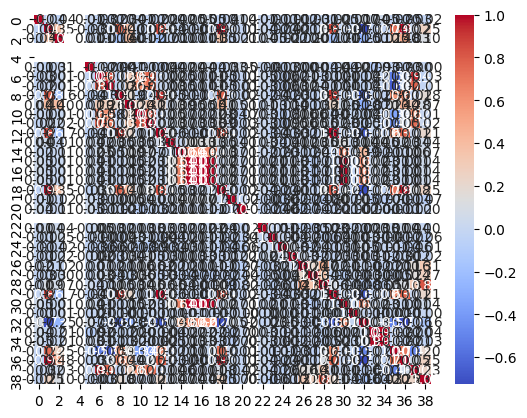

In [120]:
lifeStyleData2 = lifeStyleData.select_dtypes(exclude=['object'])
corr = np.corrcoef(lifeStyleData2.T)
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

## Ejercicio 3 — Regresión básica (2 puntos)

Queremos predecir una variable de salud continua, por ejemplo bmi.

a) (0.25 pts) Define targetVar = "bmi" y selecciona 2–3 variables predictoras (por ejemplo sleepHours, activityLevel, calories). Guarda las columnas predictoras en X y la variable objetivo en y.

In [151]:
targetVar = lifeStyleData['BMI']
X = lifeStyleData[["Resting_BPM", "Fat_Percentage", "Calories"]]
Y = targetVar

b) (0.25 pts) Divide los datos en entrenamiento (70 %) y prueba (30 %).

In [154]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=123)

c) (0.75 pts) Entrena un modelo de regresión lineal (LinearRegression) y calcula el R² y el MSE.

MSE: 6.061650246537416
R²: 0.8665136556127058


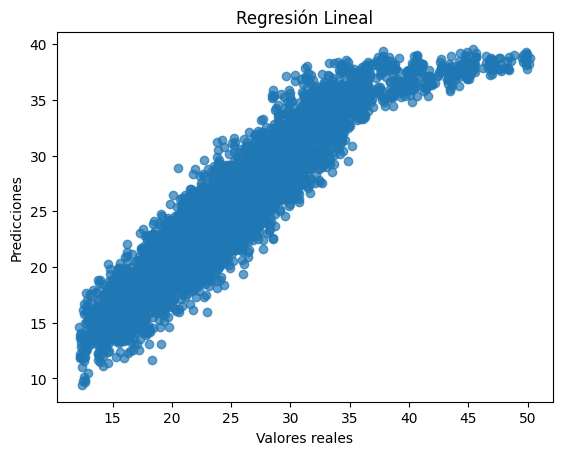

In [159]:
# Modelo de regresión lineal
reg = LinearRegression()
reg.fit(X_train, Y_train)

# Predicciones
y_pred = reg.predict(X_test)

# Métricas
print("MSE:", mean_squared_error(Y_test, y_pred))
print("R²:", r2_score(Y_test, y_pred))

# Gráfico real vs predicho
plt.scatter(Y_test, y_pred, alpha=0.7)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal")
plt.show()




d) (0.75 pts) Entrena un RandomForestRegressor con los mismos datos y compara resultados. ¿Cuál tiene mejor rendimiento?

In [160]:
rf = RandomForestRegressor().fit(X_train, Y_train)

rf = Pipeline(steps=[
  ('scaler', StandardScaler()),
  ("rf", RandomForestRegressor()),
])

rf = rf.fit(X_train, Y_train)

print("Variance explanation R^2 = {}".format(round(rf.score(X, Y),2)))

Variance explanation R^2 = 0.96


Tiene un R^2 mayor el Random Forest, por lo que se ajusta mejor

## Ejercicio 4 — Clasificación sencilla (2 puntos)

Crea una nueva variable binaria que indique si el IMC está dentro del rango saludable.

a) (0.25 pts) Crea una nueva columna bmiHealthy donde el valor sea 1 si bmi está entre 18.5 y 24.9, y 0 en caso contrario.

In [166]:
binary_bmi = []
for i in range (1,11):
    if df['imc'][i] >=18.5:
        binary_bmi[i]=1
    else:
        binary_bmi[i]=0


IndexError: list assignment index out of range

b) (0.75 pts) Entrena un modelo de regresión logística (LogisticRegression) para predecir bmiHealthy usando algunas variables de estilo de vida (por ejemplo sleepHours, activityLevel, calories).

c) (0.25 pts) Calcula la exactitud (accuracy) del modelo y muestra la matriz de confusión.


d) (0.75 pts) Explica qué variable parece influir más según el modelo.

## Ejercicio 5 — Conclusión (1 punto)

En un máximo de 300 palabras, resume:

*   Qué hábitos parecen tener mayor relación con el estado de salud.

*   Qué modelo fue más eficaz y por qué.

*   Qué podrías mejorar si tuvieras más tiempo o datos.

